# Reading and writing molecules

In [372]:
from rdkit import Chem
from rdkit.Chem import rdCIPLabeler
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem import AllChem
from rdkit import rdBase
from rdkit.Chem.rdmolfiles import SmilesWriter
from rdkit.Chem import Draw

from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.molSize = 300, 300
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True
IPythonConsole.drawOptions.minFontSize=1
rdDepictor.SetPreferCoordGen(False)

import pprint
import pandas as pd

# The majority of the basic molecular functionality is found in module rdkit.Chem

### Working with SMILES

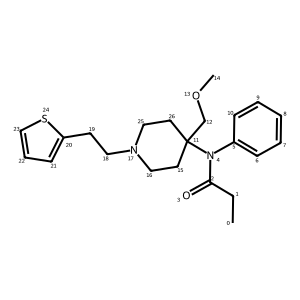

In [373]:
m1 = Chem.MolFromSmiles('CCC(=O)N(C1=CC=CC=C1)C1(COC)CCN(CCC2=CC=CS2)CC1')
m1

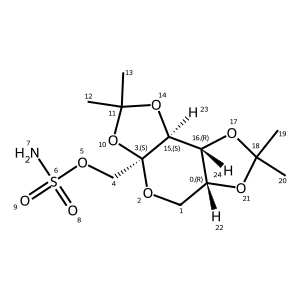

In [374]:
# Absolute configuration display

m2 = Chem.MolFromSmiles('[H][C@@]12CO[C@@]3(COS(N)(=O)=O)OC(C)(C)O[C@@]3([H])[C@]1([H])OC(C)(C)O2')
m2

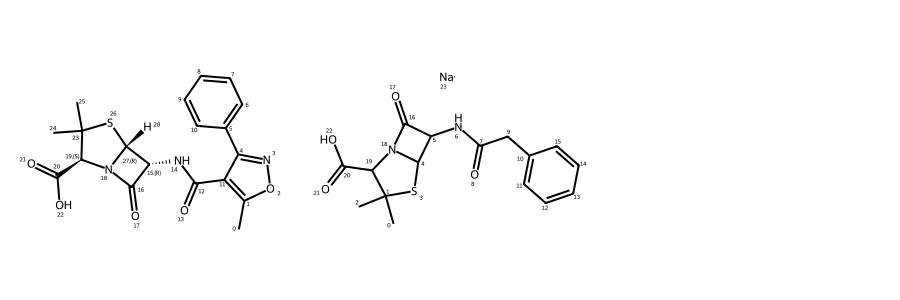

In [375]:
smiles_lst = ['Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12','CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]']
ms_list = [Chem.MolFromSmiles(x) for x in smiles_lst]
Draw.MolsToGridImage(ms_list, subImgSize=(300, 300))

In [376]:
# Include an Atom Index
# A simpler way to add atom indices is to adjust the IPythonConsole properties
# IPythonConsole.drawOptions.addAtomIndices = True

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

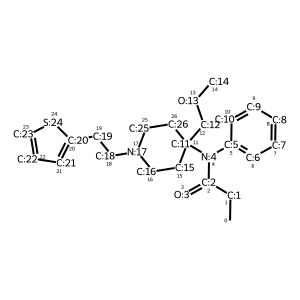

In [377]:
mol_with_atom_index(m1)

### Include a Calculation

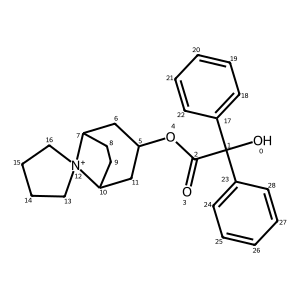

In [378]:
# Marsilli-Gasteiger partial charges

m3 = Chem.MolFromSmiles('OC(C(=O)OC1CC2CCC(C1)[N+]21CCCC1)(C1=CC=CC=C1)C1=CC=CC=C1')
AllChem.ComputeGasteigerCharges(m3)
m3

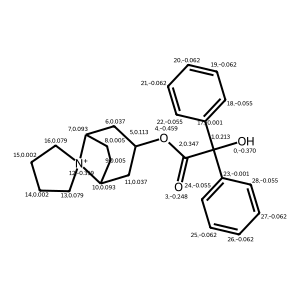

In [379]:
# Marsilli-Gasteiger partial charges for all atoms

calc = Chem.Mol(m3)
for atom in calc.GetAtoms():
    lbl = '%.3f'%(atom.GetDoubleProp("_GasteigerCharge"))
    atom.SetProp('atomNote',lbl)
calc

### Include Stereo Annotations

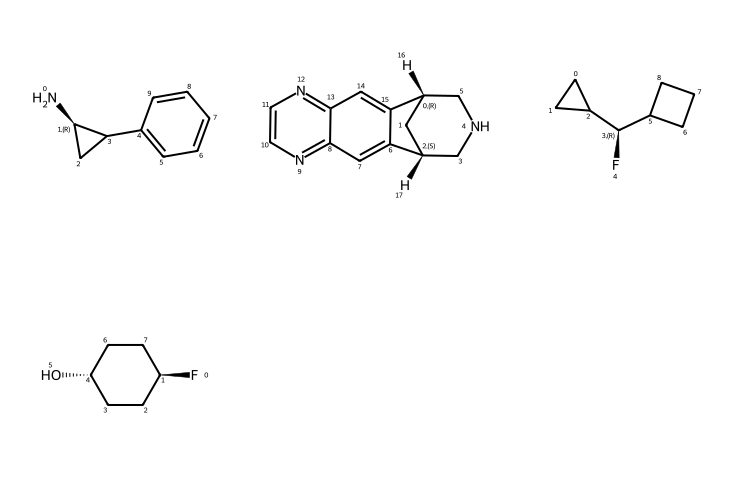

In [380]:
# Default Representation uses legacy FindMolChiralCenters() code

m4 = Chem.MolFromSmiles('N[C@@H]1CC1C1=CC=CC=C1')
m5 = Chem.MolFromSmiles('[H][C@]12C[C@]([H])(CNC1)C1=CC3=NC=CN=C3C=C21')
m6 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
m7 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
Draw.MolsToGridImage((m4, m5, m6, m7), subImgSize=(250, 250, 250, 250))

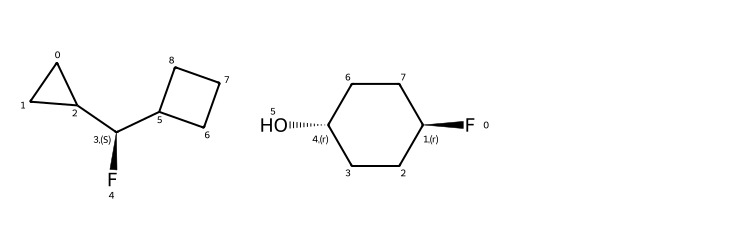

In [381]:
# New stereochemistry code with more accurate CIP labels

rdCIPLabeler.AssignCIPLabels(m6)
rdCIPLabeler.AssignCIPLabels(m7)
Draw.MolsToGridImage((m6,m7), subImgSize=(250,250))

### Highlight a Substructure in a Molecule

In [382]:
m8 = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
substructure = Chem.MolFromSmarts('C(=O)O')
print(m8.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


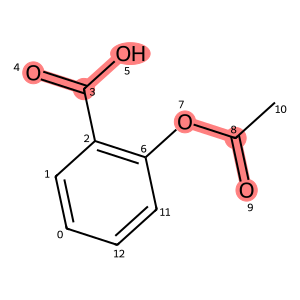

In [383]:
m8

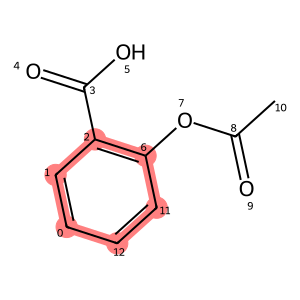

In [384]:
# You can also manually set the atoms that should be highlighted

m8.__sssAtoms = [0,1,2,6,11,12]
m8

### Highlight Molecule Differences

In [385]:
m9 = Chem.MolFromSmiles('FC1=CC=C2C(=C1)C=NN2')
m10 = Chem.MolFromSmiles('CCC1=C2NN=CC2=CC(Cl)=C1')

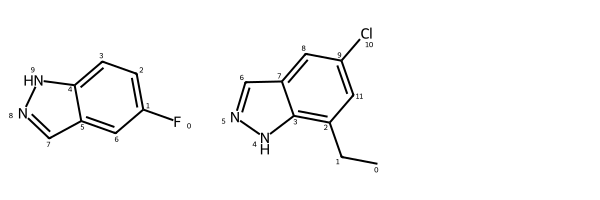

In [386]:
Draw.MolsToGridImage([m9, m10])

In [387]:
def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return Draw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])

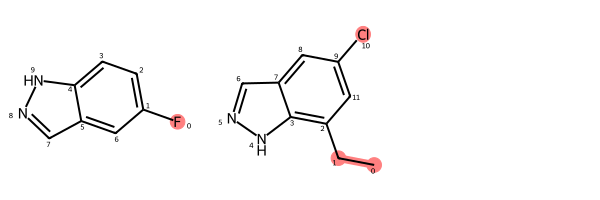

In [388]:
view_difference(m9,m10)